Введіть 1 для DFS i 2 для BFS. Будь що інше для закриття програми:  1


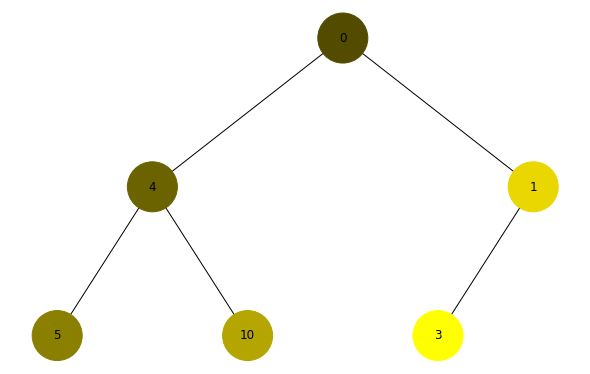

Введіть 1 для DFS i 2 для BFS. Будь що інше для закриття програми:  2


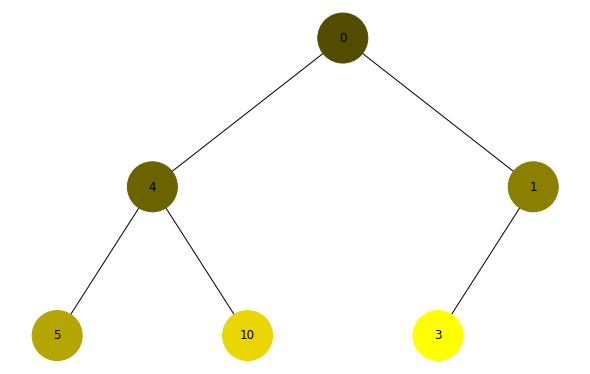

In [ ]:
#Завдання 5
import uuid

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # Додатковий аргумент для зберігання кольору вузла
        self.id = str(uuid.uuid4())  # Унікальний ідентифікатор для кожного вузла

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)  # Використання id та збереження значення вузла
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


node_colors = []
def add_darker_color(node):
    if len(node_colors) == 0:
        node_colors.append('#534C00')
    else:
        hex_color = node_colors[-1].lstrip('#')
        rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        brightened_rgb = tuple(min(int(value * 1.3), 255) for value in rgb_color)
        hex = '#{:02x}{:02x}{:02x}'.format(*brightened_rgb)
        node_colors.append(hex)

    node.color = node_colors[-1]


def dfs(node, visited=None):
    if visited is None:
        visited = set()

    if node is not None and node not in visited:
        visited.add(node)
        add_darker_color(node)
        dfs(node.left, visited)
        dfs(node.right, visited)
        

def bfs(root):
    if root is None:
        return

    visited = set()
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            add_darker_color(node)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)



def draw_tree(tree_root, method):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    if method == '1':
        dfs(tree_root)
    elif method == '2':
        bfs(tree_root)

    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}  # Використовуйте значення вузла для міток
    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()


if __name__ == '__main__':
    # Створення дерева
    root = Node(0)
    root.left = Node(4)
    root.left.left = Node(5)
    root.left.right = Node(10)
    root.right = Node(1)
    root.right.left = Node(3)

    while True:
        method = input("Введіть 1 для DFS i 2 для BFS. Будь що інше для закриття програми: ")
        if method not in ['1', '2']:
            break
        else:
            node_colors = []
            # Відображення дерева
            draw_tree(root, method)